In [2]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

import seaborn as sns
%matplotlib inline

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')



In [100]:
#import statsmodels.api as sm

In [3]:
ds = pd.read_csv("/Users/clara/Desktop/TESIS_I/DS_Final2.csv")
#le sumamos una columna donde ordenamos la varibla Campaña - Año para poder graficar correctamente
ds['Campaña-Año1'] = pd.to_datetime(ds['Campaña-Año'],format='%m-%Y') 

In [4]:



#me quedo con Campaña año 2018-03 en adelante ya que no hay registros anteriores a eso
ds_2018 = ds[(ds['Campaña-Año1']> '02-2018') &(ds['Año'] != 2022)]


Vamos a realizar un análisis de PCA para reducir la dimensionalidad del problema. 

In [5]:
#1) Nos quedamos solo con variables númericas

ds_num = ds_2018[['Tem_agua','OD','pH','Turbiedad_NTU','escher_coli_ufc_100ml','Nitrato_mg_l','NH4_mg_l','P_total_l_mg_l','DBO_mg_l','Hidr_Deriv_Petr_ug_l','Cr_total_mg_l','Cd_total_mg_l','Microcistina_ug_l','Clorofila_a_ug_l','ICA']]

ds_num['DBO_mg_l']= ds_num['DBO_mg_l'].fillna(ds_num['DBO_mg_l'].mean())




In [15]:
ds_num = ds_num.fillna(0)

In [12]:
ds_num.head()

,Tem_agua,OD,pH,Turbiedad_NTU,escher_coli_ufc_100ml,Nitrato_mg_l,NH4_mg_l,P_total_l_mg_l,DBO_mg_l,Hidr_Deriv_Petr_ug_l,Cr_total_mg_l,Cd_total_mg_l,Microcistina_ug_l,Clorofila_a_ug_l,ICA
330,22.0,0.0,8.0,69.0,400,2.0,49.0,1.0,4.0,49.0,0.006,0.002,0.50,10.0,58
333,21.0,0.0,8.0,89.0,300,3.0,49.0,0.0,18.0,49.0,0.006,0.002,0.50,10.0,61
334,22.0,0.0,8.0,82.0,400,3.0,49.0,1.0,14.0,59.0,0.006,0.002,0.50,10.0,55
343,19.0,0.0,7.0,91.0,1400,10.0,49.0,1.0,6.0,49.0,0.006,0.002,0.50,10.1,43
346,25.0,2.0,7.0,31.0,2500,3.0,39.0,1.0,4.0,100.0,5.000,0.001,0.15,0.0,30


In [16]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
ds_num.mean(axis=0)

----------------------
Media de cada variable
----------------------


Tem_agua                   17.806982
OD                          4.102669
pH                          7.055441
Turbiedad_NTU              48.455852
escher_coli_ufc_100ml    9883.878850
Nitrato_mg_l                5.301848
NH4_mg_l                    1.874743
P_total_l_mg_l              2.669199
DBO_mg_l                    9.285714
Hidr_Deriv_Petr_ug_l       71.932238
Cr_total_mg_l               7.350616
Cd_total_mg_l               0.268926
Microcistina_ug_l           0.908912
Clorofila_a_ug_l          671.667228
ICA                        45.211499
dtype: float64

In [17]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
ds_num.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


Tem_agua                 5.416431e+01
OD                       1.566022e+01
pH                       4.295274e+00
Turbiedad_NTU            1.238895e+03
escher_coli_ufc_100ml    1.124754e+09
Nitrato_mg_l             2.326878e+01
NH4_mg_l                 2.594930e+01
P_total_l_mg_l           4.910702e+02
DBO_mg_l                 4.424045e+01
Hidr_Deriv_Petr_ug_l     2.840574e+03
Cr_total_mg_l            5.761582e+02
Cd_total_mg_l            3.166224e+00
Microcistina_ug_l        5.478778e+00
Clorofila_a_ug_l         2.864824e+07
ICA                      2.363976e+02
dtype: float64

In [18]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(ds_num)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [19]:
modelo_pca.components_


array([[ 2.72173281e-01,  3.97594616e-01,  4.62684829e-01,
         1.52559931e-01, -1.29984020e-01,  8.02145614e-02,
        -3.69552261e-02, -2.38722372e-02, -1.68770561e-01,
         3.06373350e-01,  3.04933617e-01,  1.23693992e-01,
         2.87355161e-01,  5.71107450e-02,  4.34459638e-01],
       [-3.52217082e-01,  1.11542446e-01, -2.44849104e-01,
        -3.42937099e-01,  3.43715783e-03, -1.51495434e-01,
         1.29081760e-03, -9.44073515e-02, -9.44788379e-02,
         1.04769769e-01,  5.25506862e-01,  4.20469999e-02,
         5.08670407e-01,  4.09595724e-02, -3.09541177e-01],
       [ 1.56487167e-01, -2.78101762e-01,  2.15616710e-01,
        -2.05427022e-02,  5.16118330e-01,  4.49738462e-01,
         3.12921440e-01,  9.70282999e-02,  3.53211392e-01,
        -5.54941349e-02,  2.05664259e-01, -1.51849505e-01,
         2.63153425e-01, -1.02660797e-01, -4.79433474e-02],
       [ 3.45160402e-02, -2.34780429e-01, -4.15206071e-02,
         3.76357728e-01, -1.99653868e-01, -9.94176980

In [21]:
ds_num.columns


Index(['Tem_agua', 'OD', 'pH', 'Turbiedad_NTU', 'escher_coli_ufc_100ml',
       'Nitrato_mg_l', 'NH4_mg_l', 'P_total_l_mg_l', 'DBO_mg_l',
       'Hidr_Deriv_Petr_ug_l', 'Cr_total_mg_l', 'Cd_total_mg_l',
       'Microcistina_ug_l', 'Clorofila_a_ug_l', 'ICA'],
      dtype='object')

In [22]:
# Se combierte el array a dataframe para añadir nombres a los ejes.

pd.DataFrame(
    data    = modelo_pca.components_,
    columns = ds_num.columns,
    #index   = ['PC1', 'PC2', 'PC3', 'PC4']
)

,Tem_agua,OD,pH,Turbiedad_NTU,escher_coli_ufc_100ml,Nitrato_mg_l,NH4_mg_l,P_total_l_mg_l,DBO_mg_l,Hidr_Deriv_Petr_ug_l,Cr_total_mg_l,Cd_total_mg_l,Microcistina_ug_l,Clorofila_a_ug_l,ICA
0,0.272173,0.397595,0.462685,0.152560,-0.129984,0.080215,-0.036955,-0.023872,-0.168771,0.306373,0.304934,0.123694,0.287355,0.057111,0.434460
1,-0.352217,0.111542,-0.244849,-0.342937,0.003437,-0.151495,0.001291,-0.094407,-0.094479,0.104770,0.525507,0.042047,0.508670,0.040960,-0.309541
2,0.156487,-0.278102,0.215617,-0.020543,0.516118,0.449738,0.312921,0.097028,0.353211,-0.055494,0.205664,-0.151850,0.263153,-0.102661,-0.047943
3,0.034516,-0.234780,-0.041521,0.376358,-0.199654,-0.099418,-0.016436,0.484856,-0.303451,-0.445654,0.197858,0.034438,0.241825,-0.353786,0.023436
4,0.199433,-0.097097,0.015297,0.032688,0.064843,-0.458839,0.634227,-0.275059,-0.018666,0.065914,-0.022167,0.429652,-0.027878,-0.255800,-0.029334
5,-0.037905,0.011007,-0.072971,0.271767,0.227480,0.100330,-0.117129,0.293728,0.075371,0.038541,0.022557,0.698200,-0.032565,0.469893,-0.201080
6,0.130368,0.118867,0.048285,-0.113443,0.025987,-0.249187,0.452095,0.345741,-0.198223,-0.144246,0.005415,-0.372510,-0.040948,0.605098,-0.016286
7,-0.031684,0.006057,0.024782,-0.385666,0.076890,0.241030,0.120010,0.458452,-0.433739,0.447160,-0.166939,0.111127,-0.167354,-0.304185,-0.110373
8,0.307828,0.084045,0.001784,-0.161932,0.654073,-0.243459,-0.387658,-0.149706,-0.383149,-0.248221,-0.005046,-0.002930,-0.010096,-0.052859,0.028849
9,-0.195615,-0.186689,-0.119467,0.289304,0.033404,0.431999,0.220725,-0.450368,-0.592286,-0.026562,-0.006099,-0.034461,-0.007543,0.190147,0.026033


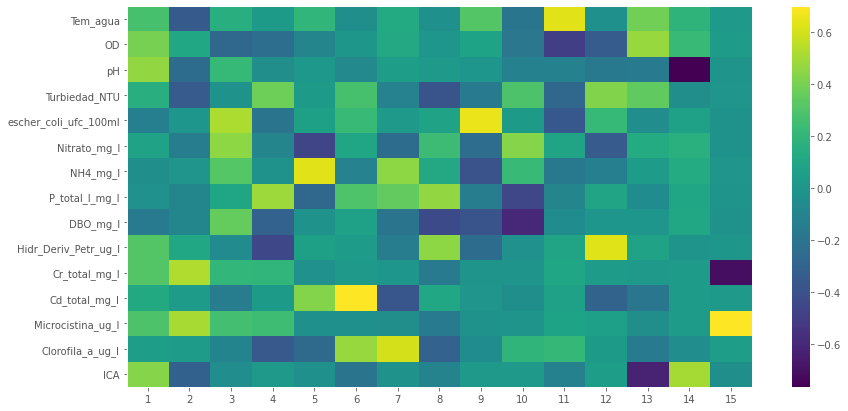

In [23]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 7))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(ds_num.columns)), ds_num.columns)
plt.xticks(range(len(ds_num.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.17002908 0.14405512 0.09535308 0.08407505 0.07161238 0.06924502
 0.06568162 0.05969878 0.05363742 0.05246419 0.04461941 0.03729147
 0.02667096 0.02270245 0.00286398]


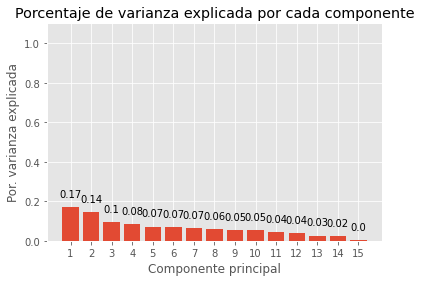

In [25]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(ds_num.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.17002908 0.31408419 0.40943727 0.49351232 0.56512471 0.63436972
 0.70005134 0.75975012 0.81338755 0.86585174 0.91047115 0.94776262
 0.97443357 0.99713602 1.        ]


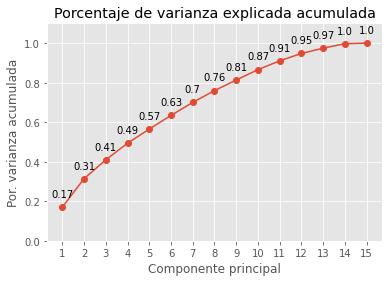

In [26]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(ds_num.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(ds_num.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [35]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=ds_num)
#proyecciones[0]

In [36]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=ds_num)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ds_num.columns
    #index   = datos.index
)
proyecciones.head()


,Tem_agua,OD,pH,Turbiedad_NTU,escher_coli_ufc_100ml,Nitrato_mg_l,NH4_mg_l,P_total_l_mg_l,DBO_mg_l,Hidr_Deriv_Petr_ug_l,Cr_total_mg_l,Cd_total_mg_l,Microcistina_ug_l,Clorofila_a_ug_l,ICA
0,-0.121026,-0.995803,2.529976,0.788744,6.371498,-1.555697,4.423528,0.813385,-3.156416,2.458355,-1.067068,-0.758266,-0.315133,0.918488,0.037504
1,-0.323898,-1.429669,3.319265,0.321390,6.234919,-1.269556,3.853025,-0.308040,-4.137764,1.516549,-1.418166,-0.564262,-0.253438,1.224387,-0.007518
2,-0.329290,-1.216085,3.146235,0.362285,6.278382,-1.274452,4.007637,0.173581,-3.895703,1.753501,-1.186416,-0.557194,-0.016103,1.001190,0.020502
3,-0.705913,-0.925931,3.264303,0.744952,5.566398,-0.942522,3.819368,0.952712,-3.912364,3.291375,-1.188000,-1.013440,0.655886,1.007233,0.043946
4,-0.594274,0.069882,1.919916,-0.167437,5.139975,-1.147022,3.595499,1.647680,-2.351686,1.613752,-0.052141,-0.622716,0.953104,0.380284,-0.103772


In [37]:
proyecciones = np.dot(modelo_pca.components_, scale(ds_num).T)
proyecciones = pd.DataFrame(proyecciones)
proyecciones = proyecciones.transpose().set_index(ds_num.index)
#proyecciones.head()
#a = proyecciones

In [38]:
proyecciones.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,4.870000e+02,487.000000,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02
mean,3.647550e-17,0.000000,1.313118e-16,-1.167216e-16,5.836080e-17,1.459020e-17,-4.377060e-17,-7.295100e-18,-6.200835e-17,-1.021314e-16,8.389365e-17,3.647550e-18,1.495495e-16,7.295100e-18,3.829927e-17
std,1.598651e+00,1.471487,1.197180e+00,1.124153e+00,1.037495e+00,1.020202e+00,9.936053e-01,9.472720e-01,8.978958e-01,8.880215e-01,8.189434e-01,7.486808e-01,6.331568e-01,5.841553e-01,2.074802e-01
min,-4.816077e+00,-2.424409,-2.866756e+00,-6.166116e+00,-5.915648e+00,-1.555697e+00,-4.042754e+00,-5.080344e+00,-4.137764e+00,-5.483000e+00,-3.017984e+00,-2.712961e+00,-2.111583e+00,-1.819669e+00,-1.657793e+00
25%,-5.011812e-01,-0.834841,-7.592890e-01,-4.838494e-01,-3.237983e-01,-4.178848e-01,-3.078931e-01,-5.836190e-01,-2.992932e-01,-3.558711e-01,-4.820379e-01,-4.123118e-01,-3.989827e-01,-3.591542e-01,-3.582270e-02
50%,1.155902e-01,-0.362682,-1.808135e-01,-1.049206e-02,-8.142680e-02,-1.869182e-01,-6.051748e-02,-1.149667e-02,4.016777e-02,-9.058009e-03,1.151144e-02,-4.285542e-02,9.074531e-03,-1.451749e-02,1.046873e-02
75%,7.462131e-01,0.182299,4.439907e-01,4.282724e-01,2.472354e-01,1.143800e-01,2.157666e-01,5.783523e-01,4.284971e-01,2.787140e-01,6.265956e-01,3.185314e-01,3.875845e-01,2.527655e-01,5.228651e-02
max,4.854817e+00,4.910072,7.189680e+00,7.805198e+00,6.371498e+00,8.251058e+00,9.576093e+00,6.244486e+00,6.497631e+00,6.234567e+00,3.108433e+00,4.349083e+00,2.806342e+00,3.428674e+00,2.921064e+00


In [39]:
loads = pd.DataFrame(pca.components_)
loads

NameError: name 'pca' is not defined

In [40]:
loads[0]

NameError: name 'loads' is not defined

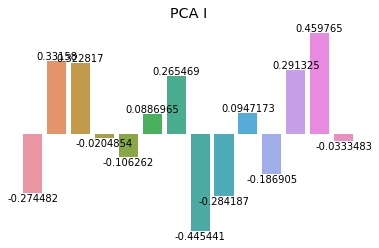

In [170]:
#graficamos los loads de las primeros 5 coponentes 

ax = sns.barplot(x=np.arange(len(loads[0])), y=loads[0])
ax.bar_label(ax.containers[0])
plt.axis('off')
plt.title('PCA I')
plt.show()

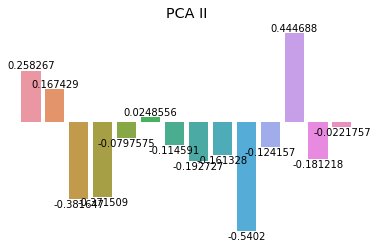

In [171]:
ax = sns.barplot(x=np.arange(len(loads[1])), y=loads[1])
ax.bar_label(ax.containers[0])
plt.axis('off')
plt.title('PCA II')
plt.show()

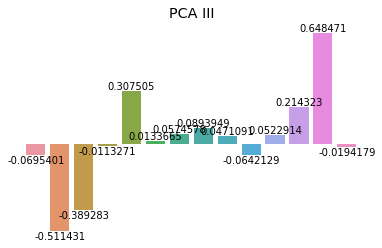

In [172]:
ax = sns.barplot(x=np.arange(len(loads[2])), y=loads[2])
ax.bar_label(ax.containers[0])
plt.axis('off')
plt.title('PCA III')
plt.show()

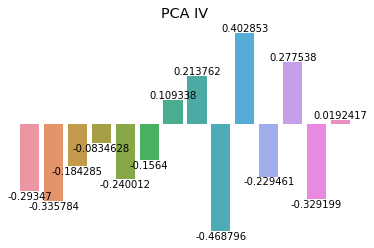

In [173]:
ax = sns.barplot(x=np.arange(len(loads[3])), y=loads[3])
ax.bar_label(ax.containers[0])
plt.axis('off')
plt.title('PCA IV')
plt.show()

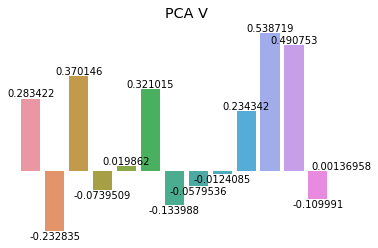

In [174]:
ax = sns.barplot(x=np.arange(len(loads[4])), y=loads[4])
ax.bar_label(ax.containers[0])
plt.axis('off')
plt.title('PCA V')
plt.show()

Todas las componentes son de forma ya que presentan valores positivos y negativos. Se observa que la componente 1 prepondera aquellas mediciones con gran precencia de microcistina, OD,pH, amonio y cadmio. La component II la precencia de cadmio, niveles de temperatura de agua y OD. La componente III prepondera la variable microsistina. La componente IV pesa sobre la presencia de hidrocarburos derivados de petróleo en contraste con DBO y por último la componente 5 pondera positivamente el cromo y el cadmio.


In [127]:
proyecciones.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
330,-1.733273,-0.518830,-2.271099,0.285539,2.418596,3.840710,0.059206,2.242892,0.840963,-0.764022,-0.101070,-0.535475,0.253641,0.336727,-0.094080
333,-2.369492,-0.338458,-2.856115,-0.913916,2.455200,3.826506,1.319439,1.209606,-0.894395,0.583919,0.068232,0.339339,0.368051,-0.568126,0.010739
334,-2.061141,-1.058670,-2.900019,-0.016512,2.151183,3.785297,0.527775,1.591737,0.041124,0.212574,0.636964,0.304663,0.215742,-0.196026,-0.036372
346,0.014823,-2.208286,0.099360,1.159794,1.473440,2.608715,-0.398591,2.583107,-0.237380,-0.433129,0.351833,-0.255349,-0.316263,-0.753516,0.090847
388,0.309741,-2.963466,1.879338,0.840165,2.696165,0.018956,0.622689,-1.156484,0.854529,0.286097,0.804785,0.024362,0.238850,0.168731,0.006445


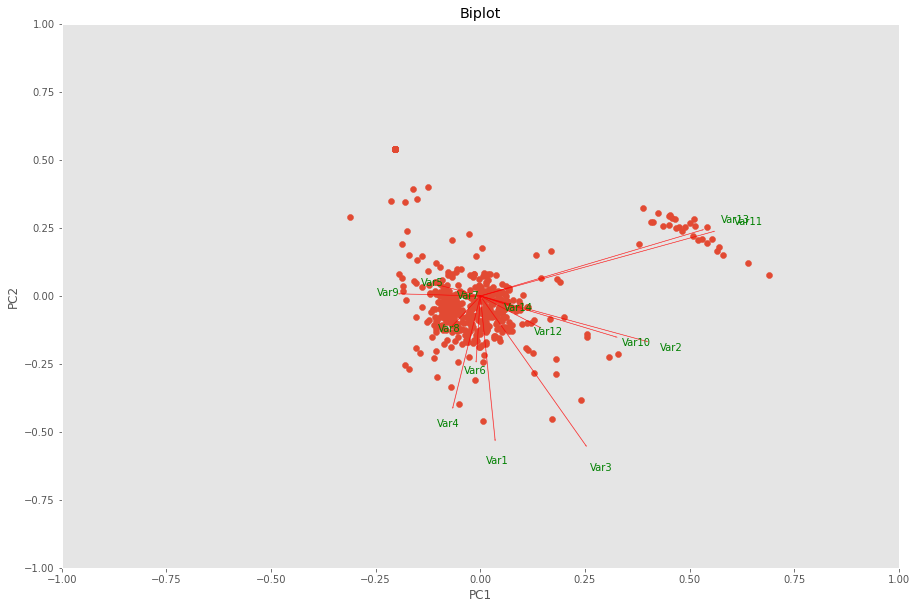

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

#iris = datasets.load_iris()
#X = iris.data
#y = iris.target



X = ds_num.drop('ICA', axis=1)
Y = ds_num['ICA']

# In general, it's a good idea to scale the data prior to PCA.
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    
pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    #plt.scatter(xs * scalex,ys * scaley, c = y)
    plt.figure(figsize=(15,10))
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.title('Biplot')
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

Las variables con angulos muy peqeuños estan muy correlacionados. 
Vemos que la variable 9 (DBO) y la variable 4 (Turbiedad) estan muy relacionadas
La variable 8 (Fosforo) y 7 (amonio) estan muy relacionbadas
La variabes 5 (Escherichia coli) y 12 (Cadmio)
La variable 11 (Cromo) y 13 (Microcistina) 
La variables 10 (Hidrocarburos) y 2 (OD) estan relacionadas 

Cuando dos variables son ortogonales (perpendiculares) indica que no están correlacionadas.

La variable 1 (temperatura) no parece estar correlacionada con el resto de las variables

Las proyecciones de las variables 10, 2 , 11, 13,5,12 son positivas sobre la componente 1 y las variables 1,9,4,7,8,3 son negativas sobre las componente 1.

Se observa que la mayoria de las mediciones son los más cercanos al origen del nuevo sistema de coordenadas y se los considera promedios.


